In [1]:
import numpy as np
import random

In [9]:
class knapsack:
    def __init__(self,weights:list[int],profits:list[int],max_capacity:int,num_solutions:int):
        self.weights=weights
        self.profits=profits
        self.max_capacity=max_capacity
        self.num_solutions=num_solutions
        self.num_items=len(self.weights)

    def initialize_population(self):
        candidate_solutions=[np.random.randint(0,2,self.num_items,dtype=bool) for _ in range(self.num_solutions)]
        return candidate_solutions

    def calculate_fitness(self,candidate_solutions:list[np.ndarray]):
        profits_list=np.zeros(self.num_solutions)
        for i,chromosome in enumerate(candidate_solutions):
            total_weight=np.sum(self.weights*chromosome)
            while(total_weight>self.max_capacity):
                random_idx=random.randint(0,self.num_items-1)
                if chromosome[random_idx]:
                    chromosome[random_idx]=False
                    total_weight-=self.weights[random_idx]
            profits_list[i]=np.sum(self.profits*chromosome)
        return profits_list

    def mutate(self,population):
        for chromosome in population:
            if random.random()<0.5:
                random_idx=random.randint(0,self.num_items-1)
                chromosome[random_idx]=not chromosome[random_idx]

    def crossover(self, population, fitness_values):
        fitness_values_exp = np.exp(fitness_values - np.max(fitness_values))
        selection_probs = fitness_values_exp / np.sum(fitness_values_exp)
        num_pairs = len(population) // 2
        selected_pairs = []
        for _ in range(num_pairs):
            parent1_idx = np.random.choice(len(population), p=selection_probs)
            parent2_idx = np.random.choice(len(population), p=selection_probs)
            selected_pairs.append((population[parent1_idx], population[parent2_idx]))

        new_population = []
        for parent1, parent2 in selected_pairs:
            crossover_point = random.randint(1, self.num_items - 1)
            child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
            child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
            new_population.append(child1)
            new_population.append(child2)

        return new_population

    def solve(self,max_iterations:int):
        avg_fitness=[]
        population=self.initialize_population()
        best_solution=None
        best_fitness=0
        for _ in range(max_iterations):
            fitness=self.calculate_fitness(population)
            population=self.crossover(population,fitness)
            self.mutate(population)
            fitness=self.calculate_fitness(population)
            avg_fitness.append(np.mean(fitness))
            population[np.argmax(fitness)]
            if np.max(fitness)>best_fitness:
              best_solution=population[np.argmax(fitness)]
              best_fitness=np.max(fitness)
        return avg_fitness,best_solution,best_fitness

In [25]:
weights = [1, 3, 4, 5, 7, 8, 9]
values = [10, 40, 50, 70, 80, 90, 100]
capacity = 15
knapsack_solver=knapsack(weights,values,capacity,100)
fitness,best_solution,best_fitness=knapsack_solver.solve(max_iterations=500)

In [26]:
print(f'The best solution was {best_solution} with profit of {best_fitness}')

The best solution was [False  True False  True  True False False] with profit of 190.0


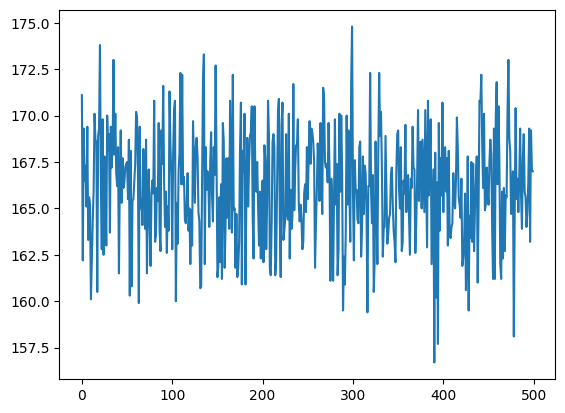

In [27]:
import matplotlib.pyplot as plt
plt.plot(range(len(fitness)),fitness)